# 감정 분석(Sentiment Analysis)

* 감정 분석은 텍스트에 등장하는 단어들을 통해 어떤 감정이 드러나는지 분석하는 기법
* 감정 분석은 오피니언 마이닝으로도 불리며, 텍스트에 담긴 의견, 태도 등을 알아보는데 유용한 기법
* 감정 분석을 하기 위해선 미리 정의된 감정 어휘 사전이 필요
* 감정 어휘 사전에 포함된 어휘가 텍스트에 얼마나 분포하는지에 따라 해당 텍스트의 감정이 좌우
* 토픽 모델링이 텍스트의 주제를 찾아낸다면, 감정 분석은 텍스트의 의견을 찾아냄
* 텍스트는 주제(토픽)와 의견(감정)의 결합으로 이루어졌다고 볼 수 있음

![2655364B5925AC9606[1].png](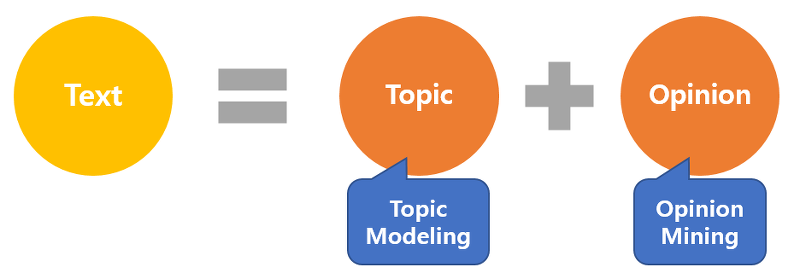)

* 감정 분석은 SNS, 리뷰 분석에 유용하게 사용할 수 있음
* 특정 이슈에 대한 사람들의 감정을 실시간으로 분석한다면, 그에 대해 신속하게 대처 가능

* 파이썬으로 감정 분석하는 방법은 크게 두 가지로 구분
  + 감정 어휘 사전을 이용한 감정 상태 분류
    -  미리 분류해둔 감정어 사전을 통해 분석하고자 하는 텍스트의 단어들을 사전에 기반해 분류하고, 그 감정가를 계산
    - 이 때 사용되는 감정어 사전에는 해당 감정에 해당되는 단어를 미리 정의해둬야 함
  + 기계학습을 이용한 감정 상태 분류
    - 분석 데이터의 일부를 훈련 데이터로 사용해 그로부터 텍스트의 감정 상태를 분류
    - 이 때 사용되는 훈련 데이터는 사용자가 분류한 감정 라벨이 포함되어 있어야 하며,  
이를 인공 신경망, 의사 결정 트리 등의 기계 학습 알고리즘을 사용하여 분류

## 감정 어휘 사전을 이용한 감정 상태 분류

### 감정 사전 준비

*   감정 사전 라이브러리를 설치
*   afinn은 영어에 대한 긍정, 부정에 대한 감정 사전을 제공


In [ ]:
pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.3 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=e323fa5b3ac28d7de162dc6504a32fa1fd88d0ff5e5f236867e9928fddf9643f
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


### 데이터 준비

1.   사용할 데이터를 구성 
2.   데이터는 사이킷런에 내장되어 있는 뉴스그룹 데이터를 이용

In [ ]:
from sklearn.datasets import fetch_20newsgroups

newsdata = fetch_20newsgroups(subset='train')
newsdata.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

### 감정 상태 분류 및 시각화

*   감정 사전을 구성하고 감정 스코어를 측정
*   afinn 라이브러리는 감정 사전과 더불어 편리하게 감정가를 계산할 수 있는 함수를 제공

In [ ]:
# 감정사전 구성, 점수측정
from afinn import Afinn

afinn = Afinn()
for i in range(10):
    print(afinn.score(newsdata.data[i])) # 뉴스 당 점수 계산

7.0
11.0
16.0
5.0
-23.0
-25.0
7.0
3.0
16.0
-20.0


*   모든 뉴스에 대한 감정을 시각화
*   긍정과 부정에 대한 갯수를 시각화



([<matplotlib.axis.XTick at 0x7f5752181110>,
 [Text(0, 0, 'positive'), Text(0, 0, 'neutral'), Text(0, 0, 'negative')])

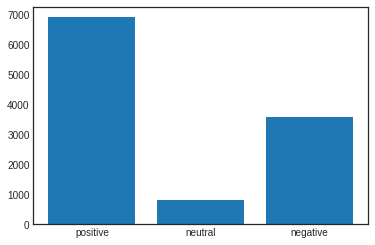

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

positive = 0
neutral = 0
negative = 0

for i in newsdata.data:
    score = afinn.score(i)
    if score > 0:
        positive += 1
    elif score == 0:
        neutral += 1
    else :
        negative += 1

plt.bar(np.arange(3), [positive, neutral, negative])
plt.xticks(np.arange(3), ['positive', 'neutral', 'negative'])

## 기계학습을 이용한 감정 분석

#### 한국어 자연어 처리 konlpy와 형태소 분석기 MeCab 설치

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [ ]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 453 kB 60.7 MB/s 
+ bash -x
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/lsb-release:DISTRIB_DESCRIPTION="Ubuntu 18.04.5 LTS"
/etc/os-release:NAME="Ubuntu"
/etc/os-release:ID=ubuntu
/etc/os-release:ID_LIKE=debian
/e

In [ ]:
import re
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### 네이버 영화 리뷰 데이터

* 참고: https://wikidocs.net/44249

#### 데이터 로드

* 데이터를 웹에서 바로 받아오기 위해 `urllib.request` 사용
  + https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
  + https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
* 받아온 데이터를 `dataframe`으로 변환하고 데이터를 확인



In [ ]:
# 네이버 영화 리뷰 데이터
train_file = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
test_file = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

train_data = pd.read_table(train_file)
test_data = pd.read_table(test_file)

train_data[:10]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


#### 중복 및 결측치 처리

*   데이터 개수 확인
*   데이터에 중복이 존재한다면 이를 제거



In [ ]:
print(train_data['document'].nunique()) # 146182
print(train_data['label'].nunique()) # 2

train_data.drop_duplicates(subset=['document'], inplace=True)

146182
2


In [ ]:
print(train_data.isnull().sum())
# id          0
# document    1
# label       0
# dtype: int64

train_data = train_data.dropna(how='any')

id          0
document    1
label       0
dtype: int64


#### 데이터 정제



*   데이터에서 한글과 공백을 제외하고 모두 제거



In [ ]:
train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')
train_data[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1
5,5403919,막 걸음마 뗀 세부터 초등학교 학년생인 살용영화ㅋㅋㅋ별반개도 아까움,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지정말 발로해도 그것보단 낫...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나,1


In [ ]:
train_data['document'].replace('', np.nan, inplace=True)
print(len((train_data))) # 146182

print(train_data.isnull().sum())

146182
id            0
document    391
label         0
dtype: int64


In [ ]:
train_data = train_data.dropna(how='any')
print(len(train_data)) # 145791

145791


In [ ]:
# test_data도 동일하게 해줍니다
test_data.drop_duplicates(subset=['document'], inplace=True)
test_data['document'] = test_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')
test_data['document'].replace('', np.nan, inplace=True)
test_data = test_data.dropna(how='any')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


#### 토큰화 및 불용어 제거



* 단어들을 분리하고 불용어를 제거함
* 불용어 사전: `'의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'`



In [ ]:
# 토큰화, 불용어 제거
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
mecab = Mecab()

X_train = []
for sentence in train_data['document']:
    X_train.append([word for word in mecab.morphs(sentence) if not word in stopwords])
print(X_train[:3]) # konlpy보다 정확한 것 같은데요?

[['아', '더', '빙', '진짜', '짜증', '나', '네요', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍', '지', '않', '구나'], ['너무', '재', '밓었다그래서보는것을추천한다']]


In [ ]:
X_test = []
for sentence in test_data['document']:
    X_test.append([word for word in mecab.morphs(sentence) if not word in stopwords])
print(X_test[:3])

[['굳', 'ㅋ'], ['뭐', '야', '평점', '나쁘', '진', '않', '지만', '점', '짜리', '더더욱', '아니', '잖아'], ['지루', '하', '지', '않', '은데', '완전', '막장', '임', '돈', '주', '고', '보', '기']]


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index) # 단어별 인덱스

{'영화': 1, '다': 2, '고': 3, '하': 4, '을': 5, '보': 6, '게': 7, '지': 8, '있': 9, '없': 10, '좋': 11, '나': 12, '었': 13, '만': 14, '는데': 15, '너무': 16, '봤': 17, '적': 18, '안': 19, '정말': 20, '로': 21, '것': 22, '음': 23, '아': 24, '네요': 25, '어': 26, '재밌': 27, '지만': 28, '같': 29, '진짜': 30, '에서': 31, '했': 32, '기': 33, '네': 34, '않': 35, '점': 36, '거': 37, '았': 38, '수': 39, '되': 40, '면': 41, 'ㅋㅋ': 42, '인': 43, '말': 44, '연기': 45, '주': 46, '최고': 47, '내': 48, '평점': 49, '이런': 50, '던': 51, '어요': 52, '할': 53, '왜': 54, '겠': 55, '스토리': 56, '해': 57, 'ㅋㅋㅋ': 58, '습니다': 59, '듯': 60, '아니': 61, '드라마': 62, '생각': 63, '더': 64, '그': 65, '싶': 66, '사람': 67, '때': 68, '감동': 69, '배우': 70, '함': 71, '본': 72, '까지': 73, '뭐': 74, '알': 75, '만들': 76, '내용': 77, '볼': 78, '보다': 79, '감독': 80, '라': 81, '재미': 82, '그냥': 83, '시간': 84, '지루': 85, '중': 86, '재미있': 87, '였': 88, '잼': 89, '년': 90, '사랑': 91, '못': 92, '재미없': 93, '냐': 94, '쓰레기': 95, '서': 96, '라고': 97, '니': 98, '면서': 99, '다시': 100, '번': 101, '나오': 102, '하나': 103, '작품': 104, '야': 105, '이거': 1

#### 빈도 수가 낮은 단어 제거



*   빈도 수가 낮은 단어는 학습에 별로 영향을 주지 않음
*   처리를 통해 빈도 수가 낮은 단어들은 제거



In [ ]:
# 빈도수 낮은 단어 제거
threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    words_freq = words_freq + value
    if value < threshold :
        rare_cnt += 1
        rare_freq = rare_freq + value
        
print('전체 단어 수:', words_cnt)
print('빈도가 {} 이하인 희귀 단어 수 : {}'.format(threshold-1, rare_cnt))
print('희귀 단어 비율 : {}'.format(rare_cnt/words_cnt*100))
print('희귀 단어 등장 빈도 비율 : {}'.format((rare_freq/words_freq)*100))

전체 단어 수: 49946
빈도가 2 이하인 희귀 단어 수 : 28320
희귀 단어 비율 : 56.70123733632323
희귀 단어 등장 빈도 비율 : 1.7606762208782198


In [ ]:
vocab_size = words_cnt - rare_cnt + 2 # 2 : 0번째 padding, out of vocabulary token
print(vocab_size) # 21482

21628


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [ ]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

X_train = np.delete(X_train, drop_train, axis = 0)
y_train = np.delete(y_train, drop_train, axis = 0)

print(len(X_train)) # 145380

145380


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


#### 패딩



*   리뷰의 전반적인 길이를 확인
*   모델의 입력을 위해 동일한 길이로 맞춰줌



In [ ]:
print('리뷰 최대 길이 :', max(len(l) for l in X_train))
print('리뷰 평균 길이 :', sum(map(len, X_train)) / len(X_train))

리뷰 최대 길이 : 83
리뷰 평균 길이 : 13.801382583574082


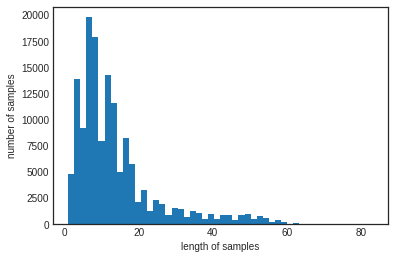

In [ ]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
max_len = 60

In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

#### 모델 구축 및 학습

*   감정 상태 분류 모델을 선언하고 학습
*   모델은 일반적인 LSTM 모델을 사용



In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         2162800   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,280,177
Trainable params: 2,280,177
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 15, batch_size = 60, validation_split = 0.2)

Epoch 1/15
1939/1939 [==============================] - 37s 14ms/step - loss: 0.3852 - acc: 0.8264 - val_loss: 0.3459 - val_acc: 0.8489
Epoch 2/15
1939/1939 [==============================] - 25s 13ms/step - loss: 0.3200 - acc: 0.8622 - val_loss: 0.3332 - val_acc: 0.8545
Epoch 3/15
1939/1939 [==============================] - 22s 11ms/step - loss: 0.2921 - acc: 0.8766 - val_loss: 0.3333 - val_acc: 0.8580
Epoch 4/15
1939/1939 [==============================] - 17s 9ms/step - loss: 0.2720 - acc: 0.8880 - val_loss: 0.3152 - val_acc: 0.8685
Epoch 5/15
1939/1939 [==============================] - 17s 9ms/step - loss: 0.2556 - acc: 0.8959 - val_loss: 0.3183 - val_acc: 0.8646
Epoch 6/15
1939/1939 [==============================] - 19s 10ms/step - loss: 0.2404 - acc: 0.9033 - val_loss: 0.3184 - val_acc: 0.8636
Epoch 7/15
1939/1939 [==============================] - 17s 9ms/step - loss: 0.2266 - acc: 0.9109 - val_loss: 0.3348 - val_acc: 0.8574
Epoch 8/15
1939/1939 [=============================

In [ ]:
model.evaluate(X_test, y_test)

#### 시각화

In [ ]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

plt.plot(loss, 'b--', label='training loss')
plt.plot(val_loss, 'r:', label='validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(acc, 'b--', label='training accuracy')
plt.plot(val_acc, 'r:', label='validation accuracy')
plt.legend()
plt.grid()

plt.show()

#### 감정 예측

In [ ]:
# 감정 예측
def sentiment_predict(new_sentence):
    new_token = [word for word in mecab.morphs(new_sentence) if word not in stopwords]
    new_sequences = tokenizer.texts_to_sequences([new_token])
    new_pad = pad_sequences(new_sequences, maxlen=max_len)
    score=float(model.predict(new_pad))
    
    if score > 0.5:
        print("{} -> 긍정({:.2f}%)".format(new_sentence, score*100))
    else:
        print("{} -> 부정({:.2f}%)".format(new_sentence, (1-score)*100))

In [ ]:
sentiment_predict('정말 재미있고 흥미진진 했어요.')
sentiment_predict('어떻게 이렇게 지루하고 재미없죠?')
sentiment_predict('분위기가 어둡고 스토리가 어려워요')
sentiment_predict('배우 연기력이 대박입니다')

# 정말 재미있고 흥미진진 했어요. -> 긍정(99.88%)
# 어떻게 이렇게 지루하고 재미없죠? -> 부정(99.98%)
# 분위기가 어둡고 스토리가 어려워요 -> 부정(89.66%)
# 배우 연기력이 대박입니다 -> 긍정(95.29%)

### 네이버 쇼핑 리뷰 데이터

* 참고: https://wikidocs.net/94600

#### 데이터 로드

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="shopping.txt")

('shopping.txt', <http.client.HTTPMessage at 0x7ff4ef2747d0>)

In [ ]:
total_data = pd.read_table('shopping.txt', names=['ratings', 'reviews'])
print(len(total_data))

200000


In [ ]:
total_data[:10]

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...


#### 훈련 데이터와 테스트 데이터 분리

In [ ]:
total_data['label'] = np.select([total_data.ratings > 3], [1], default = 0)
# 평점이 3 초과면 1, 그 이하면 0으로 레이블링

In [ ]:
total_data[:10]

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...,0
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...,0
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요,0
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~,0
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...,0


In [ ]:
total_data['ratings'].nunique(), total_data['reviews'].nunique(), total_data['label'].nunique() # nunique : 유니크한 개수

(4, 199908, 2)

In [ ]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)
print(len(total_data))

199908


In [ ]:
# 학습 데이터 나누기
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(total_data, test_size=0.25, random_state=111)
print(len(train_data), len(test_data))

149931 49977


#### 레이블의 분포 확인

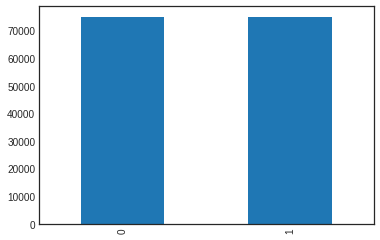

In [ ]:
train_data['label'].value_counts().plot(kind='bar')

In [ ]:
train_data.groupby('label').size().reset_index(name = 'count')

,label,count
0,0,74974
1,1,74957


#### 데이터 정제

In [ ]:
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")
train_data['reviews'].replace('', np.nan, inplace=True)
print(len(train_data))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


149931


In [ ]:
test_data.drop_duplicates(subset=['reviews'], inplace=True)
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")
test_data['reviews'].replace('', np.nan, inplace=True)
print(len(test_data))

49977


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


#### 토큰화 및 불용어 제거

* 불용어 사전: `'도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게'`

In [ ]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [ ]:
mecab = Mecab()
train_data['reviews'] =  train_data['reviews'].apply(mecab.morphs)
train_data['reviews'] =  train_data['reviews'].apply(lambda x : [item for item in x if item not in stopwords])

In [ ]:
test_data['reviews'] =  test_data['reviews'].apply(mecab.morphs)
test_data['reviews'] =  test_data['reviews'].apply(lambda x : [item for item in x if item not in stopwords])

In [ ]:
X_train = train_data['reviews'].values
y_train = train_data['label'].values
X_test = test_data['reviews'].values
y_test = test_data['label'].values

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(149931,) (149931,) (49977,) (49977,)


#### 빈도 수가 낮은 단어 제거

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    words_freq = words_freq + value
    if value < threshold :
        rare_cnt += 1
        rare_freq = rare_freq + value
        
print('전체 단어 수:', words_cnt)
print('빈도가 {} 이하인 희귀 단어 수 : {}'.format(threshold-1, rare_cnt))
print('희귀 단어 비율 : {}'.format(rare_cnt/words_cnt*100))
print('희귀 단어 등장 빈도 비율 : {}'.format((rare_freq/words_freq)*100))

전체 단어 수: 51259
빈도가 2 이하인 희귀 단어 수 : 33298
희귀 단어 비율 : 64.96029965469478
희귀 단어 등장 빈도 비율 : 1.7491235255201465




*   빈도 수가 낮은 단어는 학습에 별로 영향을 주지 않음
*   처리를 통해 빈도 수가 낮은 단어들은 제거



In [ ]:
vocab_size = words_cnt - rare_cnt + 2
print(vocab_size)

17963


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:2])

[[5439, 3, 265, 15, 1414, 107], [84, 106, 263, 93, 10, 27, 16, 2, 604, 257, 204, 536, 1528, 3171, 1585, 365, 205, 268, 564, 757, 1195, 79, 37, 142, 137, 5928, 1579, 93, 530, 49, 59, 5190, 2, 98]]


In [ ]:
print(X_test[:2])

[[12, 68, 2, 44, 338, 73, 24, 22, 4178, 241, 2], [1063, 2515, 3033, 706, 717, 9, 101, 52, 19, 49, 83]]


#### 패딩

리뷰 최대 길이 : 85
리뷰 평균 길이 : 14.819950510568194


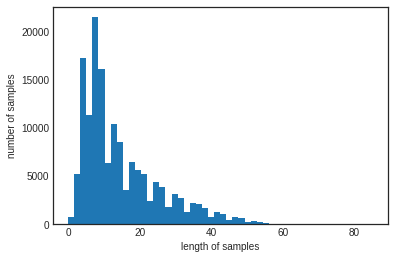

In [ ]:
# 패딩 : 리뷰의 길이 맞춰주기
print('리뷰 최대 길이 :', max(len(l) for l in X_train))
print('리뷰 평균 길이 :', sum(map(len, X_train)) / len(X_train))

# 리뷰 최대 길이 : 85
# 리뷰 평균 길이 : 15.324502604531418
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
max_len = 60

In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

#### 모델 구축 및 학습 (GRU 사용)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding , Dense, GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1,save_best_only=True ) # 가장 좋은 모델 저장함

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)
# epoch=8에서 early stopping

Epoch 1/15
2000/2000 [==============================] - ETA: 0s - loss: 0.2819 - acc: 0.8906
Epoch 1: val_acc improved from -inf to 0.90713, saving model to best_model.h5
2000/2000 [==============================] - 28s 10ms/step - loss: 0.2819 - acc: 0.8906 - val_loss: 0.2470 - val_acc: 0.9071
Epoch 2/15
1999/2000 [============================>.] - ETA: 0s - loss: 0.2251 - acc: 0.9166
Epoch 2: val_acc improved from 0.90713 to 0.91373, saving model to best_model.h5
2000/2000 [==============================] - 29s 15ms/step - loss: 0.2251 - acc: 0.9166 - val_loss: 0.2318 - val_acc: 0.9137
Epoch 3/15
1996/2000 [============================>.] - ETA: 0s - loss: 0.2083 - acc: 0.9229
Epoch 3: val_acc improved from 0.91373 to 0.91473, saving model to best_model.h5
2000/2000 [==============================] - 21s 10ms/step - loss: 0.2083 - acc: 0.9229 - val_loss: 0.2290 - val_acc: 0.9147
Epoch 4/15
1999/2000 [============================>.] - ETA: 0s - loss: 0.1967 - acc: 0.9278
Epoch 4: val_

In [ ]:
from keras.models import load_model
loaded_model = load_model('best_model.h5')
loaded_model.evaluate(X_test, y_test) # [0.20839178562164307, 0.9261460304260254]

1562/1562 [==============================] - 6s 4ms/step - loss: 0.2248 - acc: 0.9176


[0.22483240067958832, 0.9175620675086975]

#### 시각화

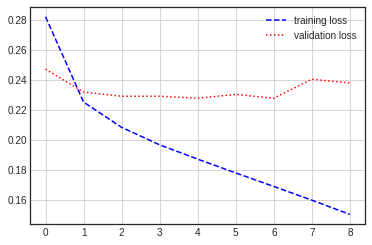

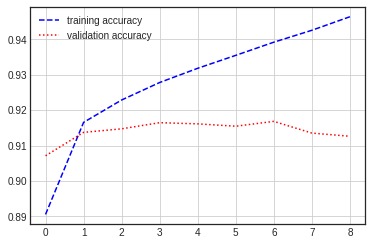

In [ ]:
# 시각화
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

plt.plot(loss, 'b--', label='training loss')
plt.plot(val_loss, 'r:', label='validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(acc, 'b--', label='training accuracy')
plt.plot(val_acc, 'r:', label='validation accuracy')
plt.legend()
plt.grid()

plt.show()

#### 감정 예측

In [ ]:
def sentiment_predict(new_sentence):
    new_token = [word for word in mecab.morphs(new_sentence) if word not in stopwords]
    new_sequences = tokenizer.texts_to_sequences([new_token])
    new_pad = pad_sequences(new_sequences, maxlen=max_len)
    score=float(loaded_model.predict(new_pad))
    
    if score > 0.5:
        print("{} -> 긍정({:.2f}%)".format(new_sentence, score*100))
    else:
        print("{} -> 부정({:.2f}%)".format(new_sentence, (1-score)*100))

In [ ]:
sentiment_predict('처음 써봤는데 대박 좋아요.')
sentiment_predict('원래 배송이 이렇게 늦나요?')
sentiment_predict('좋은 거 인정! 추가 구매 의향 있습니다.')
sentiment_predict('이건 정말 리뷰 쓰는 게 아깝네요.')

처음 써봤는데 대박 좋아요. -> 긍정(98.22%)
원래 배송이 이렇게 늦나요? -> 부정(95.63%)
좋은 거 인정! 추가 구매 의향 있습니다. -> 긍정(88.25%)
이건 정말 리뷰 쓰는 게 아깝네요. -> 부정(90.28%)
